# OpenAQ API for air quality data

- Data source: [https://openaq.org/](https://openaq.org/)
- API documentation: [https://docs.openaq.org/docs](https://docs.openaq.org/docs)
- `py-openaq` package to read data direcly into dataframes: [https://dhhagan.github.io/py-openaq/index.html](https://dhhagan.github.io/py-openaq/index.html)

In [12]:
import openaq
import seaborn as sns
import pandas as pd
import air_quality as aq
import importlib
importlib.reload(aq);

api = openaq.OpenAQ()

# resp = api.cities(df=True, limit=10000)
city_data = aq.request_data('city_data.csv', api.cities, limit=10000)

# display the first 10 rows
city_data.head(30)
# city_data.info()



Reading from local file...


,Unnamed: 0,country,city,count,locations
0,0,JP,,14907063,1525
1,1,US,007,19567,4
2,2,US,015,1025,1
3,3,US,037,12538,1
4,4,US,039,4583,2
5,5,US,047,19420,4
6,6,US,057,1589,1
7,7,US,059,1373,1
8,8,US,069,656,1
9,9,US,Aberdeen,50602,1


In [15]:
# how many cities are available in each country?
city_data.groupby('country')['city'].nunique()

# get the country data
country_data = aq.request_data('country_data.csv', api.countries, limit=500)
country_data.head(10)

Reading from local file...


,Unnamed: 0,code,name,locations,count,cities
0,0,NaN,N. Cyprus,1,393966,0
1,1,AE,United Arab Emirates,32,12271547,9
2,2,AF,Afghanistan,3,1888344,1
3,3,AM,Armenia,8,9060216,1
4,4,AO,Angola,3,2232354,0
5,5,AQ,Antarctica,2,9180,0
6,6,AR,Argentina,16,4066746,1
7,7,AT,Austria,295,25294607,11
8,8,AU,Australia,750,608843703,51
9,9,AZ,Azerbaijan,2,2874161,1


In [33]:
# Add a column in the "cities" dataset to indicate country name
# 1. Match the column names I want to use for merging
# 2. Merge the "name" column into the "cities" dataset

country_data.rename(columns={'code': 'country'}, inplace=True)

# or:
# country_data = country_data.rename(columns={'code': 'country'})

city_data.head(10)

# Merge country names into city_data
# country_data[['country', 'name']]
city_data = pd.merge(city_data, country_data[['country', 'name']])
city_data
# print(city_data.groupby('name')['city'].nunique().tail(10))
# print(country_data[['name', 'cities']].sort_values(by='name').tail(10))

,Unnamed: 0,country,city,count,locations,name
0,0,JP,,14907063,1525,Japan
1,1,US,007,19567,4,United States of America
2,2,US,015,1025,1,United States of America
3,3,US,037,12538,1,United States of America
4,4,US,039,4583,2,United States of America
...,...,...,...,...,...,...
2440,2431,BG,Смолян,90070,1,Bulgaria
2441,2432,BG,София (столица),525895,5,Bulgaria
2442,2433,BG,Стара Загора,144750,2,Bulgaria
2443,2437,BG,Хасково,119441,1,Bulgaria


In [40]:
delhi_data = aq.request_data('delhi.csv', endpoint=api.measurements, city='London', parameter='pm25', limit=10000,
                             date_from='2023-11-13', date_to='2023-11-20')
# delhi_data.info()
delhi_data['date.utc'] = pd.to_datetime(delhi_data['date.utc'])
print(delhi_data.info())

Reading from local file...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588 entries, 0 to 1587
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   date.local             1588 non-null   object             
 1   location               1588 non-null   object             
 2   parameter              1588 non-null   object             
 3   value                  1588 non-null   float64            
 4   unit                   1588 non-null   object             
 5   country                1588 non-null   object             
 6   city                   0 non-null      float64            
 7   date.utc               1588 non-null   datetime64[ns, UTC]
 8   coordinates.latitude   1588 non-null   float64            
 9   coordinates.longitude  1588 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(5)
memory usage: 124.2+ KB
None


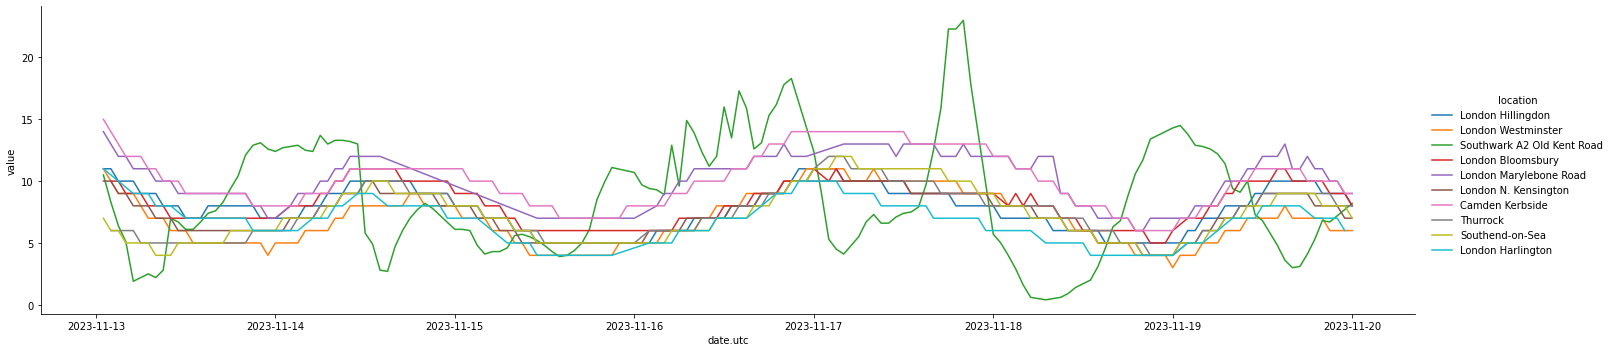

In [44]:
sns.relplot(data=delhi_data, x='date.utc', y='value', aspect=4, hue='location', kind='line')